こちらのノートブックはKaggleの以下のページを参考に作られています

https://www.kaggle.com/code/louisong97/neural-network-approach-to-iris-dataset

# 導入

こちらのノートブックでは、**Neural Network（ニューラルネットワーク）**を用いて、花の**アヤメ（Iris）**の種類を分類するタスクに取り組みます。

このタスクでは、機械学習における基本的な分類問題を題材に、ニューラルネットワークの構築・学習・評価の流れを実践的に学びます。

## Neural Networkとは？

ニューラルネットワークとは、人間の脳の神経細胞（ニューロン）の仕組みを模倣したモデルです。  
入力層（Input Layer）、隠れ層（Hidden Layer）、出力層（Output Layer）の層構造からなり、データの特徴を段階的に抽出していきます。

ニューラルネットワークは、画像認識、音声認識、自然言語処理など、さまざまな分野で高い性能を発揮しており、現代のAI技術の中核を担っています。

## アヤメのデータセットと分類タスクについて

アヤメのデータセット（Iris Dataset）は、機械学習で広く使われている有名なデータセットです。

このデータセットには、3種類のアヤメの花（Setosa, Versicolor, Virginica）について、それぞれ50個体ずつの計150サンプルが含まれています。各サンプルには以下の4つの特徴量が記録されています。

- がく片の長さ（sepal length）
- がく片の幅（sepal width）
- 花弁の長さ（petal length）
- 花弁の幅（petal width）

今回の分類タスクでは、これらの特徴量からアヤメの種類を予測するモデルをニューラルネットワークで作成します。

## 本講義の目的

本講義の目的は、以下の3点です：

1. **ニューラルネットワークの基本的な構造と動作の理解**  
   入力層、隠れ層、出力層の役割や、活性化関数、損失関数、重みの学習について学びます。

2. **分類問題におけるニューラルネットワークの適用方法を学ぶ**  
   データの前処理、モデルの構築、学習、評価の一連の流れを体験します。

3. **実装を通じて、モデルのパラメータやハイパーパラメータが結果に与える影響を理解する**  
   学習率、エポック数、層の数などを変えて結果を比較し、モデル設計の感覚を養います。



# 必要なパッケージのインストール

本講義で使うパッケージは以下のとおりです：

- `keras` : neural networkモデルを作成できるパッケージ  
- `pandas` : テーブルデータを操作するパッケージ  
- `seaborn` : 統計的なデータ可視化に特化したライブラリ  
- `matplotlib` : グラフや図を描画するための基本ライブラリ  
- `numpy` : 数値計算を効率的に行うためのパッケージ  
- `scikit-learn`（`sklearn`）: 機械学習のためのライブラリ  


In [5]:
!pip install tensorflow keras pandas seaborn matplotlib numpy pandas scikit-learn tensorboard lightgbm graphviz

zsh:1: command not found: pip


In [27]:
# Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.datasets import load_iris

# データセットの準備

In [28]:
# Irisのデータはscikit-learnで用意されています。
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target # label

print(data["target"].unique())
print(iris.target_names)
# 実務でCSVなどからデータを取得する場合、以下のように読み込みます
# data=pd.read_csv("../input/Iris.csv")

[0 1 2]
['setosa' 'versicolor' 'virginica']


## データの確認

ロードしたデータの中身を見てみましょう。
- head: データの先頭数行を見ることができます。
- describe: 統計情報を見ることができます
- info: データのメタ情報を見ることができます

In [29]:
print("10 first samples of the dataset:", data.head(10), "\n")
print("10 last samples of the dataset:", data.tail(10), "\n")
print("Describing the data: \n", data.describe(), "\n")
print(data.info())

10 first samples of the dataset:    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7

## データセットのビジュアライゼーション (探索的データ解析; EDA)

機械学習を始める前に、まずはデータをより理解する必要があります。
データサイエンティストは、モデルの実装よりもデータへの理解やデータ整形に時間を必要とすることが一般的です。

以下のコーディングは、データをより理解するためのデータセットの視覚化です。アイリスのすべての種が、予測すべき異なる領域に分別できることがわかります

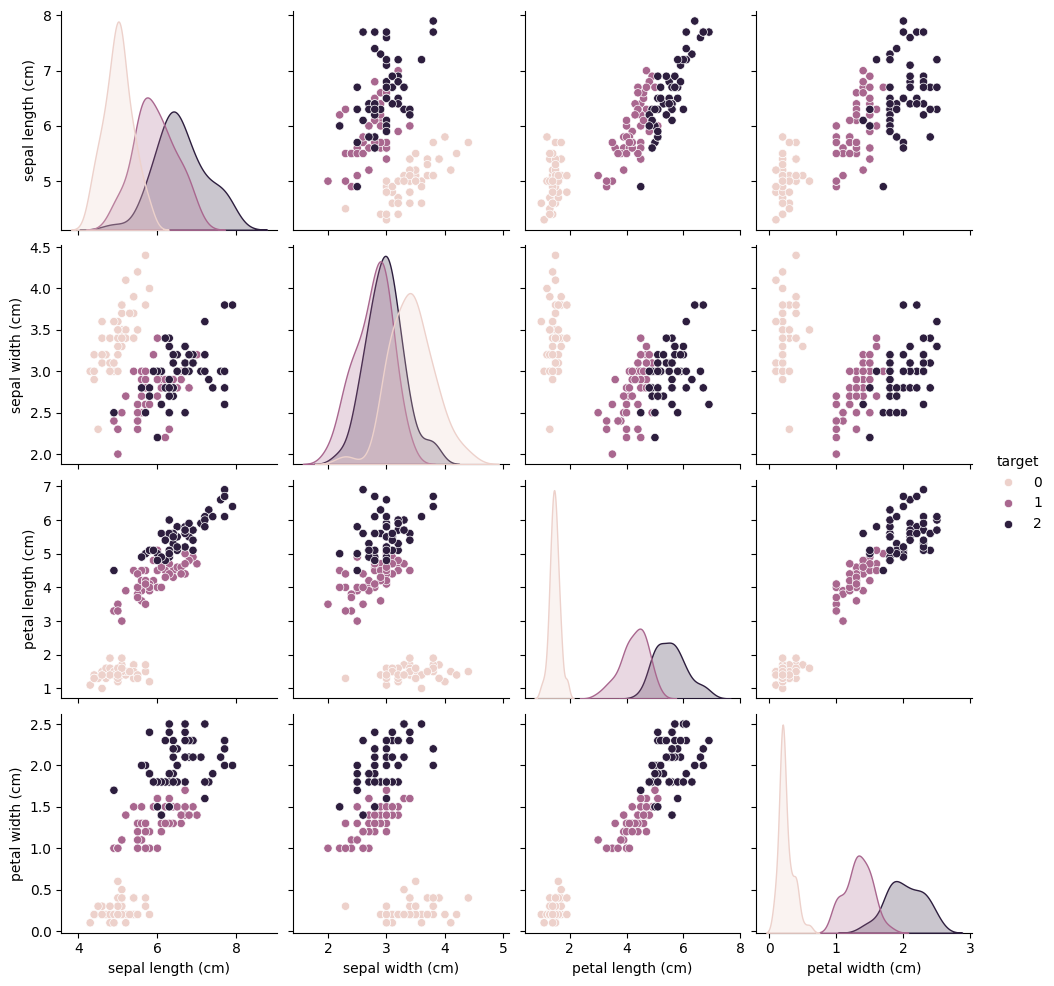

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


# JupyterLab で実行する際は、この行を書くことで描画できるようになります。
%matplotlib inline
sns.pairplot(data, hue="target")

plt.show()


### データの前処理

データへの理解が進んだところで、モデルに入力するためにデータ整形を行います。

今回はシャッフルするだけですが、他にも色々な処理を入れることが一般的です
- カテゴリ（label）を数値に変換する
- 擬似的にデータにノイズをかけて、データ拡張
- データの標準化

In [31]:
data=data.iloc[np.random.default_rng(seed=42).permutation(len(data))]
print(data.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
70                 5.9               3.2                4.8               1.8   
79                 5.7               2.6                3.5               1.0   
134                6.1               2.6                5.6               1.4   
3                  4.6               3.1                1.5               0.2   
123                6.3               2.7                4.9               1.8   

     target  
70        1  
79        1  
134       2  
3         0  
123       2  


### データの分割
説明変数(x)と目的変数(y)に分割します

In [32]:
X=data.iloc[:,:4].values
y=data.iloc[:,4:].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150, 1)
Examples of X
 [[5.9 3.2 4.8 1.8]
 [5.7 2.6 3.5 1. ]
 [6.1 2.6 5.6 1.4]]
Examples of y
 [[1]
 [1]
 [2]]


### Normalization

以上から、最初のデータセットの特徴は、Sepal Lengthが5.9cm、Sepal Widthが3.2cm、Petal Lengthが4.8cm、Petal Widthが1.8cmであることがわかります。
しかし、カラム間で値のとりうる範囲は異なる可能性があるため、精度を維持するためには、各データセットの特徴を0-1の範囲に正規化して処理する必要があります。

In [33]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.08163129 0.08460991 0.09445032 0.10352182]
 [0.07886413 0.06874555 0.06887002 0.05751212]
 [0.08439845 0.06874555 0.11019204 0.08051697]]


### 学習セットと検証セットの分割



データセットを学習(training)セットと、モデルの汎化性を測るための検証(validation)セットに分割します。

ここで注意が必要なのが、train dataの中に、validation setの情報が入っていないことです。

In [34]:
#Creating train,test and validation data
'''
80% -- train data
10% -- valid data
10% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
valid_length=int(0.1*total_length)
test_length=int(0.1*total_length)

X_train=X_normalized[:train_length]
X_valid=X_normalized[train_length:train_length+valid_length]
X_test=X_normalized[train_length+valid_length:]
y_train=y[:train_length]
y_valid=y[train_length:train_length+valid_length]
y_test=y[train_length+valid_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of valid set x:",X_valid.shape[0],"y:",y_valid.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of valid set x: 15 y: 15
Length of test set x: 15 y: 15


In [35]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from keras import utils

In [36]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=utils.to_categorical(y_train,num_classes=3)
y_valid=utils.to_categorical(y_valid,num_classes=3)
y_test=utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_valid",y_valid.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_valid (15, 3)
Shape of y_test (15, 3)


# モデル定義 : Neural Network
いよいよモデルを定義していきます。

これから作るモデル構造はざっくりと以下の通りです。
![nn-model](./nn-model.png)

### Dense
すべての入力がすべての出力ノードに接続される層。主に特徴の重みづけ・学習を行います
例えば入力が5次元、出力が3次元の場合は以下のようなモデル構造になります

![dense](./dense.png)

### Drop out
→ ニューロンをランダムに一定割合「無効化」して、過学習（overfitting）を防ぐための正則化手法です

以下の図は Dropout 40%でDense3からの入力をDropoutしている様子です。
Dropoutによってモデルの一部を欠損させて学習させることで、モデルが頑健になります

![dropout](dropout.png)


In [37]:
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


# 小さいLearning Rateを設定（例: 0.0001）
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model = Sequential([
    Dense(1000, activation='relu', input_shape=(4,)),
    Dense(500, activation='relu'),
    Dense(300, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

/Users/takahiro.kinouchi/Documents/mitene/2025BeginnerTrainingAI/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 1000)           │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,703 (2.51 MB)

 Trainable params: 656,703 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from datetime import datetime

logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model.fit(
    X_train,
    y_train,
    validation_data=(X_valid,y_valid),
    batch_size=100,
    epochs=100,
    verbose=1,
    callbacks=[tensorboard_callback],
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3678 - loss: 1.0983 - val_accuracy: 0.2667 - val_loss: 1.0856
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4356 - loss: 1.0816 - val_accuracy: 0.3333 - val_loss: 1.0708
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4800 - loss: 1.0622 - val_accuracy: 0.8000 - val_loss: 1.0442
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7411 - loss: 1.0323 - val_accuracy: 0.8667 - val_loss: 1.0006
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8578 - loss: 0.9996 - val_accuracy: 0.7333 - val_loss: 0.9513
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7211 - loss: 0.9599 - val_accuracy: 0.7333 - val_loss: 0.8960
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7944 - loss: 0.8981 - val_accuracy: 1.0000 - val_loss: 0.8307
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8967 - loss: 0.8329 - val_accuracy: 0.9333 - val_loss:

## モデルの学習結果確認

tensorboardを使うと、学習曲線と呼ばれる学習過程でのモデルのlossやaccuracyの遷移を確認することができます。

学習曲線を見ることで、学習がうまくいったか、過学習していないかを観察します

In [40]:
%load_ext tensorboard
%tensorboard --logdir logs/scalars

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 28519), started 0:01:37 ago. (Use '!kill 28519' to kill it.)

# Neural Networkモデルの評価

保持していた `test` データセットを使ってモデルの精度を検証してみましょう。

In [41]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset", accuracy, "%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy of the dataset 100.0 %


このデータセットでは、100%の精度が達成されました。

Neural Networkは学習によって、テーブルデータからアヤメの種類を分類することができました。

# EX：過学習させてみよう

モデルのパラメータ数が大きくなると、モデルが過学習を起こしやすくなります。

例えば、Dnese層のoutputの次元数を数倍にしてみて学習してみましょう。

# モデル定義 : 勾配ブースティング決定木 (GBDT)

今度は、Neural Networkを使わずに、テーブルデータによく用いられる勾配ブースティング木を使って学習してみます

In [42]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# データ整形

LightGBMはカテゴリの出力を勝手に内部でワンホットベクトルに直してくれるため、ワンホット→ラベルに直します

In [43]:
#Change the label to one hot vector
'''
[1 0 0]--->[0]
[0 1 0]--->[1]
[0 0 1]--->[2]
'''
y_train = np.argmax(y_train, axis=1)
y_valid = np.argmax(y_valid, axis=1)
y_test = np.argmax(y_test, axis=1)

print("Shape of y_train:", y_train.shape)
print("Shape of y_valid:", y_valid.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (120,)
Shape of y_valid: (15,)
Shape of y_test: (15,)


In [44]:
# LightGBM用データセットに変換（バリデーションあり）
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)


# モデルの学習
LightGBMモデルの定義を行います。

## ハイパーパラメータの意味
objective: モデルの目的。ここでは多クラス分類（multiclass）

num_class: クラスの数。必ず multiclass とセットで指定します

metric: 損失関数の種類。multi_logloss は一般的な多クラス分類に適した指標

verbosity: ログの出力レベル。-1 にすることでログを抑制しています

## コールバック関数の説明
early_stopping: 検証データでのスコアが一定回数（ここでは10回）改善しないと、学習を途中で終了します（過学習防止）。

log_evaluation: 指定された間隔（ここでは10回ごと）で評価結果を出力します。

record_evaluation: 学習中のスコア（lossなど）を evals に保存し、後から学習曲線を可視化できます。


In [50]:
# ハイパーパラメータの設定（必要に応じてチューニング可）
params = {
    'objective': 'multiclass',
    'num_class': 3,  # アヤメは3クラス分類
    'metric': 'multi_logloss',
    'verbosity': -1
}

# 学習
evals = {} # 学習曲線を保存する
model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=100,
    callbacks=[
        lgb.early_stopping(stopping_rounds=10, verbose=True),
        lgb.log_evaluation(10),
        lgb.record_evaluation(evals),
    ]
)


Training until validation scores don't improve for 10 rounds
[10]	training's multi_logloss: 0.305129	valid_1's multi_logloss: 0.465415
[20]	training's multi_logloss: 0.124361	valid_1's multi_logloss: 0.320923
[30]	training's multi_logloss: 0.062919	valid_1's multi_logloss: 0.328108
Early stopping, best iteration is:
[23]	training's multi_logloss: 0.0999124	valid_1's multi_logloss: 0.313873


## 学習曲線の確認

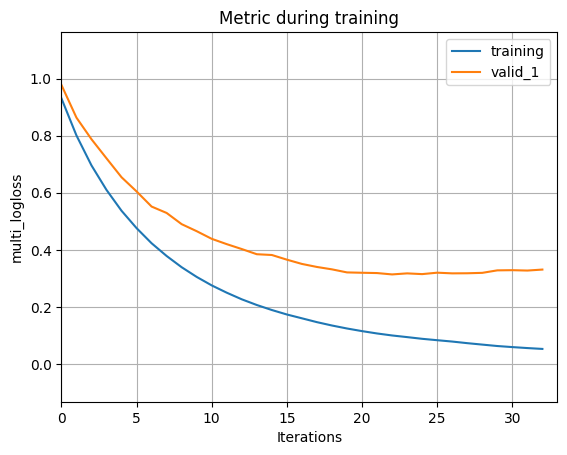

In [46]:
_ = lgb.plot_metric(evals)
plt.show()            

# 評価

モデルの精度評価を行います
100%で推論できていることがわかると思います

In [47]:
# テストデータで予測（確率 → クラス）
y_pred_proba = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = y_pred_proba.argmax(axis=1)

# 評価
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["setosa", "versicolor", "virginica"])

print(f"✅ Accuracy: {acc*100:.4f} %")
print("📋 Classification Report:")
print(report)

✅ Accuracy: 100.0000 %
📋 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         2
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# モデルの分析

木構造の確認と、特徴量の重要度を見てみましょう。

## 木構造

勾配ブースティング決定木によって学習された決定木モデルの１つをみてみましょう。
小さい木構造で十分に推論が難しそうと感じるかもしれませんが、勾配ブースティングによるアンサンブル学習により、より高い精度を出すことが可能になっています

## 特徴量の重要度

どの特徴量が出力に寄与したかを見ることができます。下の図をみると、column2, column3がより重要となっており、`petal length (cm)` `petal width (cm)` の値が重要ということがわかります。


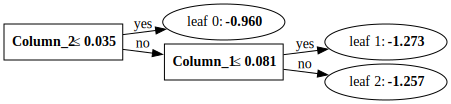

In [48]:
lgb.create_tree_digraph(model)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

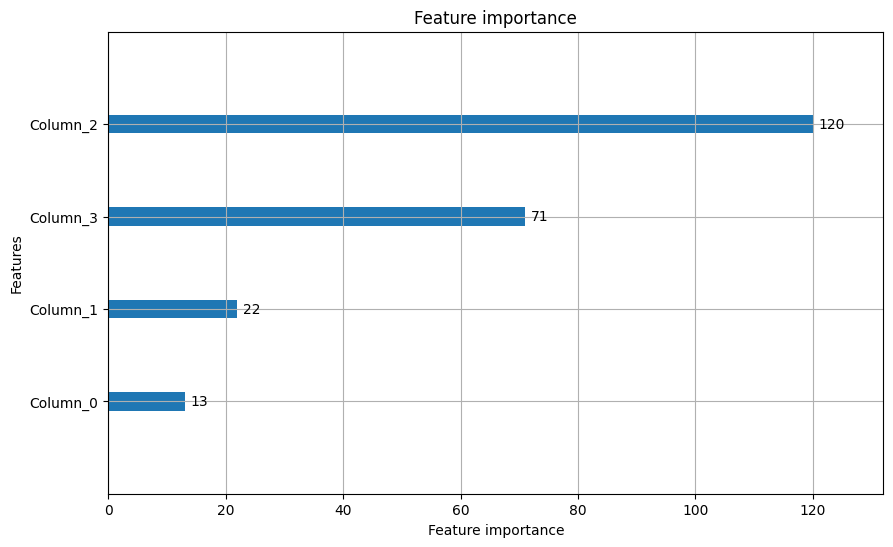

In [49]:
lgb.plot_importance(model, importance_type="split", figsize=(10, 6))